In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
print(now)

2019-03-27 14:11:00.650134


In [4]:
datetime.now().day

27

In [5]:
now1 = datetime.now()
print(now1)

2019-03-27 14:11:00.703449


In [6]:
print(now1 - now)

0:00:00.053315


In [7]:
from datetime import timedelta

In [8]:
now = datetime.now()
print(now)

2019-03-27 14:11:00.747868


In [9]:
now1 = now + timedelta(hours = 1,days = 2)
print(now1)

2019-03-29 15:11:00.747868


In [10]:
now = datetime.now()
print(now)

2019-03-27 14:11:00.773388


In [11]:
str(now)

'2019-03-27 14:11:00.773388'

In [12]:
a = datetime.strftime(now,'%F')
a

'2019-03-27'

In [13]:
b = datetime.strptime(a,'%Y-%m-%d')
print(b)

2019-03-27 00:00:00


In [14]:
datestrs = ['7/6/2011', '8/6/2011']
[print(datetime.strptime(i,'%d/%m/%Y')) for i in datestrs]

2011-06-07 00:00:00
2011-06-08 00:00:00


[None, None]

In [15]:
from dateutil import parser

In [16]:
parser.parse('2010-jan-31',dayfirst=True)

datetime.datetime(2010, 1, 31, 0, 0)

In [17]:
idx = pd.to_datetime(datestrs)

In [18]:
print(idx)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)


In [19]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
   ....:          datetime(2011, 1, 7), datetime(2011, 1, 8),
   ....:          datetime(2011, 1, 10), datetime(2011, 1, 12)]


In [20]:
a = pd.Series(np.random.rand(6),index=dates)
a

2011-01-02    0.322993
2011-01-05    0.484826
2011-01-07    0.295374
2011-01-08    0.189876
2011-01-10    0.565364
2011-01-12    0.506326
dtype: float64

In [21]:
a.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
a + a[::2]

2011-01-02    0.645986
2011-01-05         NaN
2011-01-07    0.590749
2011-01-08         NaN
2011-01-10    1.130728
2011-01-12         NaN
dtype: float64

In [23]:
a

2011-01-02    0.322993
2011-01-05    0.484826
2011-01-07    0.295374
2011-01-08    0.189876
2011-01-10    0.565364
2011-01-12    0.506326
dtype: float64

In [24]:
ts = a.index[0]
a[ts]

0.32299297742073585

In [25]:
a['1/10/2011']

0.5653639693241415

In [26]:
a['20110110']

0.5653639693241415

In [27]:
ts_longer = pd.Series(np.random.rand(1000),index=pd.date_range(datetime.now(),periods=1000))

In [28]:
ts_longer[datetime(2020,3,3):].head()

2020-03-03 14:11:01.105575    0.324988
2020-03-04 14:11:01.105575    0.202285
2020-03-05 14:11:01.105575    0.046591
2020-03-06 14:11:01.105575    0.240438
2020-03-07 14:11:01.105575    0.947040
Freq: D, dtype: float64

In [29]:
ts_longer['2019-03-27']

2019-03-27 14:11:01.105575    0.136465
Freq: D, dtype: float64

In [30]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado', 'Texas','New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.641167,0.163894,-0.986674,-0.069041
2000-01-12,-1.249534,-1.085723,0.827216,-0.536546
2000-01-19,-0.457968,-0.183089,0.133200,-0.972784
2000-01-26,-0.095201,0.504056,0.795916,2.949415
2000-02-02,-0.555551,0.284030,1.507343,-0.558170


In [31]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000','1/2/2000', '1/3/2000'])

In [32]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [33]:
dup_ts.index.is_unique

False

In [34]:
dup_ts['1/3/2000']

4

In [35]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [36]:
grouped = dup_ts.groupby(dup_ts.index)

In [37]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [38]:
resampler = a.resample('D')

In [39]:
resampler.count()

2011-01-02    1
2011-01-03    0
2011-01-04    0
2011-01-05    1
2011-01-06    0
2011-01-07    1
2011-01-08    1
2011-01-09    0
2011-01-10    1
2011-01-11    0
2011-01-12    1
Freq: D, dtype: int64

In [40]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='1h20min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:20:00',
               '2000-01-01 02:40:00', '2000-01-01 04:00:00',
               '2000-01-01 05:20:00', '2000-01-01 06:40:00',
               '2000-01-01 08:00:00', '2000-01-01 09:20:00',
               '2000-01-01 10:40:00', '2000-01-01 12:00:00',
               '2000-01-01 13:20:00', '2000-01-01 14:40:00',
               '2000-01-01 16:00:00', '2000-01-01 17:20:00',
               '2000-01-01 18:40:00', '2000-01-01 20:00:00',
               '2000-01-01 21:20:00', '2000-01-01 22:40:00',
               '2000-01-02 00:00:00', '2000-01-02 01:20:00',
               '2000-01-02 02:40:00', '2000-01-02 04:00:00',
               '2000-01-02 05:20:00', '2000-01-02 06:40:00',
               '2000-01-02 08:00:00', '2000-01-02 09:20:00',
               '2000-01-02 10:40:00', '2000-01-02 12:00:00',
               '2000-01-02 13:20:00', '2000-01-02 14:40:00',
               '2000-01-02 16:00:00', '2000-01-02 17:20:00',
               '2000-01-

In [42]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='W-FRI')
list(rng)

[Timestamp('2012-01-06 00:00:00', freq='W-FRI'),
 Timestamp('2012-01-13 00:00:00', freq='W-FRI'),
 Timestamp('2012-01-20 00:00:00', freq='W-FRI'),
 Timestamp('2012-01-27 00:00:00', freq='W-FRI'),
 Timestamp('2012-02-03 00:00:00', freq='W-FRI'),
 Timestamp('2012-02-10 00:00:00', freq='W-FRI'),
 Timestamp('2012-02-17 00:00:00', freq='W-FRI'),
 Timestamp('2012-02-24 00:00:00', freq='W-FRI'),
 Timestamp('2012-03-02 00:00:00', freq='W-FRI'),
 Timestamp('2012-03-09 00:00:00', freq='W-FRI'),
 Timestamp('2012-03-16 00:00:00', freq='W-FRI'),
 Timestamp('2012-03-23 00:00:00', freq='W-FRI'),
 Timestamp('2012-03-30 00:00:00', freq='W-FRI'),
 Timestamp('2012-04-06 00:00:00', freq='W-FRI'),
 Timestamp('2012-04-13 00:00:00', freq='W-FRI'),
 Timestamp('2012-04-20 00:00:00', freq='W-FRI'),
 Timestamp('2012-04-27 00:00:00', freq='W-FRI'),
 Timestamp('2012-05-04 00:00:00', freq='W-FRI'),
 Timestamp('2012-05-11 00:00:00', freq='W-FRI'),
 Timestamp('2012-05-18 00:00:00', freq='W-FRI'),
 Timestamp('2012-05-

In [43]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.134666
2000-02-29   -0.354036
2000-03-31   -0.486581
2000-04-30    0.785361
Freq: M, dtype: float64

In [44]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -1.134666
2000-03-31   -0.354036
2000-04-30   -0.486581
Freq: M, dtype: float64

In [45]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.687982
2000-03-31    0.374382
2000-04-30   -2.614041
Freq: M, dtype: float64

In [46]:
ts.shift(-2,freq='D')

2000-01-29   -1.134666
2000-02-27   -0.354036
2000-03-29   -0.486581
2000-04-28    0.785361
dtype: float64

In [47]:
from pandas.tseries.offsets import Day,MonthEnd,MonthBegin

In [48]:
now = datetime.now()

In [49]:
now

datetime.datetime(2019, 3, 27, 14, 11, 1, 506837)

In [50]:
now + 2*Day()

Timestamp('2019-03-29 14:11:01.506837')

In [51]:
now + MonthEnd(-2)

Timestamp('2019-01-31 14:11:01.506837')

In [52]:
now + MonthBegin(2)

Timestamp('2019-05-01 14:11:01.506837')

In [53]:
ts = pd.Series(np.random.randn(20),
   .....:                index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.893335
2000-01-19   -0.446307
2000-01-23    1.720853
2000-01-27   -0.461828
2000-01-31   -0.577913
2000-02-04    0.478141
2000-02-08    0.377690
2000-02-12   -0.711194
2000-02-16    1.183124
2000-02-20    1.678863
2000-02-24    0.499719
2000-02-28   -1.229905
2000-03-03    0.108521
2000-03-07    1.354092
2000-03-11   -0.563729
2000-03-15    0.419622
2000-03-19   -0.766693
2000-03-23   -1.702275
2000-03-27   -0.806273
2000-03-31    1.710031
Freq: 4D, dtype: float64

In [54]:
offset = MonthEnd(-1)
ts.groupby(ts.index + MonthBegin()).mean()

2000-02-01   -0.131706
2000-03-01    0.325205
2000-04-01   -0.030838
Freq: 4D, dtype: float64

In [55]:
import pytz

In [56]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [57]:
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [58]:
now = datetime.now()
now

datetime.datetime(2019, 3, 27, 14, 11, 2, 2444)

In [59]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00   -0.369468
2012-03-10 09:30:00   -0.410577
2012-03-11 09:30:00   -2.640912
2012-03-12 09:30:00    0.468519
2012-03-13 09:30:00   -0.783610
2012-03-14 09:30:00    0.909143
Freq: D, dtype: float64

In [60]:
print(ts.index.tz)

None


In [61]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.369468
2012-03-10 09:30:00+00:00   -0.410577
2012-03-11 09:30:00+00:00   -2.640912
2012-03-12 09:30:00+00:00    0.468519
2012-03-13 09:30:00+00:00   -0.783610
2012-03-14 09:30:00+00:00    0.909143
Freq: D, dtype: float64

In [62]:
ts_ny = ts_utc.tz_convert('America/New_York')
ts_ny

2012-03-09 04:30:00-05:00   -0.369468
2012-03-10 04:30:00-05:00   -0.410577
2012-03-11 05:30:00-04:00   -2.640912
2012-03-12 05:30:00-04:00    0.468519
2012-03-13 05:30:00-04:00   -0.783610
2012-03-14 05:30:00-04:00    0.909143
Freq: D, dtype: float64

In [63]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.707331
2012-03-08 09:30:00   -1.643219
2012-03-09 09:30:00   -0.686797
2012-03-12 09:30:00   -1.440822
2012-03-13 09:30:00    1.041768
2012-03-14 09:30:00   -0.591774
2012-03-15 09:30:00    0.542885
2012-03-16 09:30:00   -2.413944
2012-03-19 09:30:00    1.178804
2012-03-20 09:30:00   -1.523168
Freq: B, dtype: float64

In [64]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.707331
2012-03-08 09:30:00+00:00   -1.643219
2012-03-09 09:30:00+00:00   -0.686797
2012-03-12 09:30:00+00:00   -1.440822
2012-03-13 09:30:00+00:00    1.041768
2012-03-14 09:30:00+00:00   -0.591774
2012-03-15 09:30:00+00:00    0.542885
Freq: B, dtype: float64

In [65]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.686797
2012-03-12 13:30:00+04:00   -1.440822
2012-03-13 13:30:00+04:00    1.041768
2012-03-14 13:30:00+04:00   -0.591774
2012-03-15 13:30:00+04:00    0.542885
Freq: B, dtype: float64

In [66]:
result = ts1+ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.373595
2012-03-12 09:30:00+00:00   -2.881643
2012-03-13 09:30:00+00:00    2.083537
2012-03-14 09:30:00+00:00   -1.183549
2012-03-15 09:30:00+00:00    1.085771
Freq: B, dtype: float64

In [67]:
rng = pd.period_range('2000-01-01', '2001-06-30', freq='m')

In [68]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06'],
            dtype='period[M]', freq='M')

In [69]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [70]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.838552
2000-02-29   -0.041087
2000-03-31    1.066247
Freq: M, dtype: float64

In [71]:
a = ts.to_period('Q-JAN')
a

2000Q4   -0.838552
2001Q1   -0.041087
2001Q1    1.066247
Freq: Q-JAN, dtype: float64

In [72]:
a.to_timestamp(how='start')

1999-11-01   -0.838552
2000-02-01   -0.041087
2000-02-01    1.066247
dtype: float64

In [73]:
ts = pd.Series(np.random.rand(5),index=pd.date_range('2010-01-27',periods=5,freq='Q-JAN'))
ts = ts.to_period('Q-JAN')
ts

2010Q4    0.467384
2011Q1    0.187004
2011Q2    0.775516
2011Q3    0.124847
2011Q4    0.353558
Freq: Q-JAN, dtype: float64

In [74]:
ts.to_timestamp()

2009-11-01    0.467384
2010-02-01    0.187004
2010-05-01    0.775516
2010-08-01    0.124847
2010-11-01    0.353558
Freq: QS-NOV, dtype: float64

In [75]:
data = pd.read_csv(r'C:\Users\ashwi\Desktop\Ashwin\pydata-book\examples/macrodata.csv')

In [76]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [77]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [78]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [79]:
index = pd.PeriodIndex(year = data.year , month = data.quarter,freq = 'm')

In [80]:
index

PeriodIndex(['1959-01', '1959-02', '1959-03', '1959-04', '1960-01', '1960-02',
             '1960-03', '1960-04', '1961-01', '1961-02',
             ...
             '2007-02', '2007-03', '2007-04', '2008-01', '2008-02', '2008-03',
             '2008-04', '2009-01', '2009-02', '2009-03'],
            dtype='period[M]', length=203, freq='M')

In [81]:
data.index = index

In [82]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-01,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-02,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-03,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-04,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-01,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
1960-02,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
1960-03,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
1960-04,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
1961-01,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
1961-02,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [85]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.rand(len(rng)),index=rng)
ts

2000-01-01    0.634600
2000-01-02    0.127044
2000-01-03    0.416883
2000-01-04    0.316700
2000-01-05    0.467694
2000-01-06    0.173751
2000-01-07    0.928199
2000-01-08    0.586184
2000-01-09    0.552928
2000-01-10    0.353460
2000-01-11    0.593513
2000-01-12    0.073784
2000-01-13    0.007891
2000-01-14    0.768521
2000-01-15    0.855971
2000-01-16    0.171743
2000-01-17    0.322061
2000-01-18    0.159524
2000-01-19    0.089222
2000-01-20    0.267068
2000-01-21    0.013451
2000-01-22    0.155105
2000-01-23    0.675314
2000-01-24    0.029941
2000-01-25    0.504725
2000-01-26    0.815701
2000-01-27    0.906821
2000-01-28    0.477004
2000-01-29    0.860249
2000-01-30    0.371323
                ...   
2000-03-11    0.176899
2000-03-12    0.604424
2000-03-13    0.059809
2000-03-14    0.041032
2000-03-15    0.660679
2000-03-16    0.958603
2000-03-17    0.958540
2000-03-18    0.476094
2000-03-19    0.104598
2000-03-20    0.069426
2000-03-21    0.683584
2000-03-22    0.571693
2000-03-23 

In [92]:
f =lambda x:x.max() - x.min()
ts.resample('M').apply(f)

2000-01-31    0.920309
2000-02-29    0.964524
2000-03-31    0.986246
2000-04-30    0.678291
Freq: M, dtype: float64

In [93]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [108]:
ts.resample('5T',closed='left',loffset='-1s',label='left').ohlc()

,open,high,low,close
1999-12-31 23:59:59,0,4,0,4
2000-01-01 00:04:59,5,9,5,9
2000-01-01 00:09:59,10,11,10,11


In [116]:
frame = pd.DataFrame(np.random.randn(2, 4),
   .....:                      index=pd.date_range('1/1/2000', periods=2,
   .....:                                          freq='W-WED'),
   .....:                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.138777,1.166892,-1.035090,-0.355413
2000-01-12,0.921269,0.246737,-1.341434,0.158462


In [115]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.379607,0.361381,0.125082,1.956149
2000-01-13,-0.534027,0.185559,-0.509167,0.903405


In [119]:
frame = pd.DataFrame(np.random.randn(24, 4),
   .....:                      index=pd.period_range('1-2000', '12-2001',
   .....:                                            freq='M'),
   .....:                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,2.097392,-0.583374,-1.985980,-0.862925
2000-02,-0.153146,-0.325338,1.392050,-1.108292
2000-03,-0.775161,-0.233111,-1.365286,1.675294
2000-04,-0.352035,-0.227120,-0.823262,0.757625
2000-05,0.351096,-0.710716,-0.680040,-0.967942


In [123]:
frame.resample('Q-JAN').mean()

,Colorado,Texas,New York,Ohio
2000Q4,2.097392,-0.583374,-1.985980,-0.862925
2001Q1,-0.426781,-0.261857,-0.265499,0.441542
2001Q2,-0.277000,-0.050265,-0.385630,0.166288
2001Q3,-0.449862,-0.648811,1.392002,-0.285416
2001Q4,0.400681,0.258901,-0.026578,0.399781
2002Q1,0.756520,-0.326490,0.793379,0.145491
2002Q2,-0.940823,0.079371,-0.652094,-0.555672
2002Q3,-0.057508,0.229855,0.309051,0.800304
2002Q4,0.579510,-0.253786,-0.492954,0.529734


In [124]:
close_px_all = pd.read_csv(r'C:\Users\ashwi\Desktop\Ashwin\pydata-book\examples/stock_px_2.csv',
   .....:                            parse_dates=True, index_col=0)

In [133]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


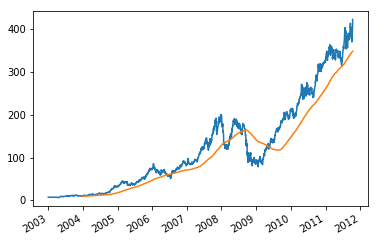

In [131]:
import matplotlib.pyplot as plt
close_px_all.AAPL.plot()
close_px_all.AAPL.rolling(250).mean().plot()
plt.show()

In [137]:
close_px_all.AAPL.resample('M').mean()

2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
2003-06-30      9.089048
2003-07-31     10.127273
2003-08-31     10.312857
2003-09-30     11.077143
2003-10-31     11.505217
2003-11-30     10.799474
2003-12-31     10.336364
2004-01-31     11.401500
2004-02-29     11.402105
2004-03-31     13.099565
2004-04-30     13.763333
2004-05-31     13.539000
2004-06-30     15.666667
2004-07-31     15.645238
2004-08-31     15.875000
2004-09-30     18.342381
2004-10-31     22.182857
2004-11-30     28.733333
2004-12-31     32.250000
2005-01-31     34.614500
2005-02-28     41.864737
2005-03-31     41.997727
2005-04-30     38.730952
2005-05-31     37.321905
2005-06-30     37.590909
                 ...    
2009-05-31    128.149000
2009-06-30    139.528182
2009-07-31    149.318182
2009-08-31    166.280476
2009-09-30    177.786667
2009-10-31    192.831364
2009-11-30    200.320000
2009-12-31    198.954545
2010-01-31    207.715263


In [138]:
close_px_all.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15          NaN
2003-01-16          NaN
2003-01-17          NaN
2003-01-21          NaN
2003-01-22          NaN
2003-01-23          NaN
2003-01-24          NaN
2003-01-27          NaN
2003-01-28          NaN
2003-01-29          NaN
2003-01-30          NaN
2003-01-31          NaN
2003-02-03          NaN
2003-02-04          NaN
2003-02-05          NaN
2003-02-06          NaN
2003-02-07          NaN
2003-02-10          NaN
2003-02-11          NaN
2003-02-12          NaN
2003-02-13          NaN
                ...    
2011-09-02    335.88740
2011-09-06    336.35408
2011-09-07    336.83616
2011-09-08    337.30456
2011-09-09    337.74224
2011-09-12    338.18112
2011-09-13    338.61332
2011-09-14    339.06904
2011-09-15    339.50796
2011-09-16    339.97488
2011-09-19    34

In [154]:
import fix_yahoo_finance as fyf
import pandas_datareader as pdr
data = pdr.get_data_yahoo('GLD', start='2016-11-08',end=datetime.now())

In [160]:
data_clode = pd.DataFrame(data.Close)
data_clode

,Close
Date,
2016-11-08,121.639999
2016-11-09,121.559998
2016-11-10,119.750000
2016-11-11,117.099998
2016-11-14,116.110001
2016-11-15,117.120003
2016-11-16,116.769997
2016-11-17,116.169998
2016-11-18,115.150002


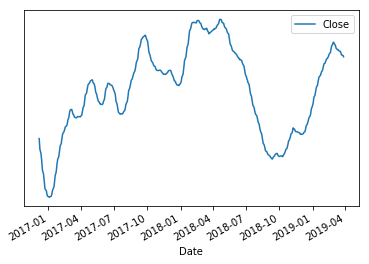

In [164]:
data_clode.rolling(21).mean().plot(logy = True)

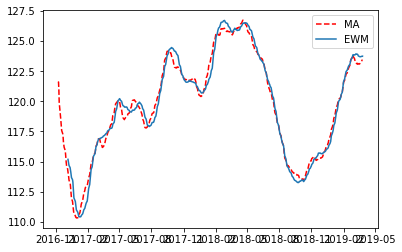

In [190]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ma60 = data_clode.ewm(span=30).mean()
ewm60 = data_clode.rolling(30, min_periods=20).mean()
ax1.plot(ma60 , color = 'r',linestyle = '--')
ax1.plot(ewm60)
plt.legend(['MA',"EWM"])


In [192]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
returns = close_px.pct_change()

In [204]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

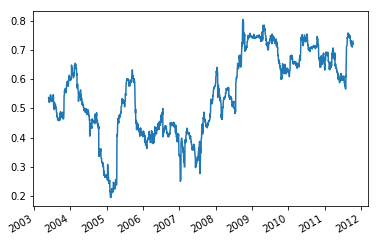

In [205]:
corr.plot()

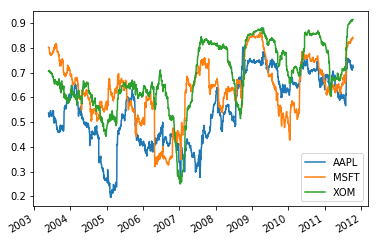

In [206]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()